# SVM - TikTok

In [1]:
import sys
import os
import pandas as pd

# Agregar el directorio raiz al PYTHONPATH
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

Importar modelo de SVM para entrenarlo

In [2]:
from src.trainers.train_svm import train_svm
from src.trainers.utils import save_model
from src.trainers.utils import build_datasets, save_metrics
from constants.constants_tiktok import TIKTOK_DATASET_SENTENCES, TIKTOK_SVM_METRICS_PATH

dataset_train, dataset_test, dataset_val = build_datasets(
    TIKTOK_DATASET_SENTENCES,
    test_size=0.3,
    val_size=0.5, # 0.5 de 0.3    
    random_state=42
)
print(dataset_train.shape)
print(dataset_test.shape)
print(dataset_val.shape)

(13727, 2)
(2942, 2)
(2942, 2)


In [3]:
import numpy as np

list_kernel = ["linear", "rbf", 'poly']
list_vectorizers = ["tfidf", "bow"]
list_C = np.logspace(-2, 1, 20)
print(list_C)

[ 0.01        0.0143845   0.02069138  0.02976351  0.04281332  0.06158482
  0.08858668  0.1274275   0.18329807  0.26366509  0.37926902  0.54555948
  0.78475997  1.12883789  1.62377674  2.33572147  3.35981829  4.83293024
  6.95192796 10.        ]


## Entrenar modelos

In [4]:
for vectorizer in list_vectorizers:
    for kernel in list_kernel:
        for C in list_C:
            pipeline, metrics = train_svm(
                dataset_train,
                dataset_val,
                C=C,
                kernel=kernel,
                vec=vectorizer
            )
            print(f"SVM {vectorizer} {kernel} {C}: {metrics['accuracy']}")
            # Guardar Pipeline
            save_metrics(metrics, TIKTOK_SVM_METRICS_PATH)

SVM tfidf linear 0.01: 0.34568320870156355
SVM tfidf linear 0.01438449888287663: 0.358599592114208
SVM tfidf linear 0.0206913808111479: 0.3891910265125765
SVM tfidf linear 0.029763514416313176: 0.4507138001359619
SVM tfidf linear 0.04281332398719394: 0.5003399048266486
SVM tfidf linear 0.06158482110660264: 0.5669612508497621
SVM tfidf linear 0.08858667904100823: 0.6033310673011557
SVM tfidf linear 0.12742749857031335: 0.631883072739633
SVM tfidf linear 0.18329807108324356: 0.6563562202583276
SVM tfidf linear 0.26366508987303583: 0.6777702243371856
SVM tfidf linear 0.37926901907322497: 0.6825288919102651
SVM tfidf linear 0.5455594781168517: 0.6893269884432359
SVM tfidf linear 0.7847599703514611: 0.6954452753229096
SVM tfidf linear 1.1288378916846884: 0.6893269884432359
SVM tfidf linear 1.623776739188721: 0.6954452753229096
SVM tfidf linear 2.3357214690901213: 0.69068660774983
SVM tfidf linear 3.359818286283781: 0.6838885112168592
SVM tfidf linear 4.832930238571752: 0.677430319510537
SVM

c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM tfidf rbf 0.01: 0.3416043507817811


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM tfidf rbf 0.01438449888287663: 0.3416043507817811


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM tfidf rbf 0.0206913808111479: 0.3416043507817811
SVM tfidf rbf 0.029763514416313176: 0.3433038749150238
SVM tfidf rbf 0.04281332398719394: 0.3653976886471788
SVM tfidf rbf 0.06158482110660264: 0.3847722637661455
SVM tfidf rbf 0.08858667904100823: 0.4476546566961251
SVM tfidf rbf 0.12742749857031335: 0.509517335146159
SVM tfidf rbf 0.18329807108324356: 0.5744391570360299
SVM tfidf rbf 0.26366508987303583: 0.6162474507138002
SVM tfidf rbf 0.37926901907322497: 0.6512576478585996
SVM tfidf rbf 0.5455594781168517: 0.672331747110809
SVM tfidf rbf 0.7847599703514611: 0.6913664174031271
SVM tfidf rbf 1.1288378916846884: 0.6920462270564242
SVM tfidf rbf 1.623776739188721: 0.6964649898028552
SVM tfidf rbf 2.3357214690901213: 0.6961250849762066
SVM tfidf rbf 3.359818286283781: 0.6951053704962611
SVM tfidf rbf 4.832930238571752: 0.6937457511896669
SVM tfidf rbf 6.951927961775605: 0.6934058463630184
SVM tfidf rbf 10.0: 0.6937457511896669


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM tfidf poly 0.01: 0.4276002719238613


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM tfidf poly 0.01438449888287663: 0.4276002719238613


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM tfidf poly 0.0206913808111479: 0.4276002719238613


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM tfidf poly 0.029763514416313176: 0.4276002719238613


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM tfidf poly 0.04281332398719394: 0.4276002719238613


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM tfidf poly 0.06158482110660264: 0.4276002719238613
SVM tfidf poly 0.08858667904100823: 0.43133922501699523
SVM tfidf poly 0.12742749857031335: 0.44221617946974845
SVM tfidf poly 0.18329807108324356: 0.3776342624065262
SVM tfidf poly 0.26366508987303583: 0.3990482664853841
SVM tfidf poly 0.37926901907322497: 0.4507138001359619
SVM tfidf poly 0.5455594781168517: 0.5489462950373896
SVM tfidf poly 0.7847599703514611: 0.6070700203942896
SVM tfidf poly 1.1288378916846884: 0.6274643099932019
SVM tfidf poly 1.623776739188721: 0.6189666893269884
SVM tfidf poly 2.3357214690901213: 0.619306594153637
SVM tfidf poly 3.359818286283781: 0.6182868796736913
SVM tfidf poly 4.832930238571752: 0.6172671651937458
SVM tfidf poly 6.951927961775605: 0.6142080217539089
SVM tfidf poly 10.0: 0.6128484024473148
SVM bow linear 0.01: 0.5567641060503059
SVM bow linear 0.01438449888287663: 0.5846363018354861
SVM bow linear 0.0206913808111479: 0.6152277362338545
SVM bow linear 0.029763514416313176: 0.6397008837525

c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM bow rbf 0.01: 0.3769544527532291
SVM bow rbf 0.01438449888287663: 0.38443235893949695
SVM bow rbf 0.0206913808111479: 0.3922501699524133
SVM bow rbf 0.029763514416313176: 0.4265805574439157
SVM bow rbf 0.04281332398719394: 0.4612508497620666
SVM bow rbf 0.06158482110660264: 0.4983004758667573
SVM bow rbf 0.08858667904100823: 0.5268524813052345
SVM bow rbf 0.12742749857031335: 0.5571040108769545
SVM bow rbf 0.18329807108324356: 0.5836165873555405
SVM bow rbf 0.26366508987303583: 0.6108089734874235
SVM bow rbf 0.37926901907322497: 0.6332426920462271
SVM bow rbf 0.5455594781168517: 0.6549966009517335
SVM bow rbf 0.7847599703514611: 0.6675730795377295
SVM bow rbf 1.1288378916846884: 0.6760707002039429
SVM bow rbf 1.623776739188721: 0.6869476546566962
SVM bow rbf 2.3357214690901213: 0.6917063222297757
SVM bow rbf 3.359818286283781: 0.6917063222297757
SVM bow rbf 4.832930238571752: 0.6872875594833446
SVM bow rbf 6.951927961775605: 0.6845683208701564
SVM bow rbf 10.0: 0.6808293677770224
S

## Modelo con mayor accuracy

In [5]:
# Seleccionar los hiperparámetros que generan mayor accuracy
df_metrics = pd.read_csv(TIKTOK_SVM_METRICS_PATH)

best_acc = df_metrics.loc[df_metrics['accuracy'].idxmax()]
print(best_acc)

accuracy           0.703943
recall             0.703926
precision          0.714602
f1_score           0.706368
model                   SVM
vectorizer              BOW
dataset                 VAL
regularization     0.263665
kernel               LINEAR
vocab_size             9046
train_time        14.143469
Name: 69, dtype: object


In [7]:
from constants.constants_tiktok import SVM_PIPELINE_PATH

# Entrenar modelo
pipeline, metrics = train_svm(
    dataset_train,
    dataset_val,
    C=best_acc['regularization'],
    kernel=best_acc['kernel'].lower(),
    vec=best_acc['vectorizer']
)

save_model(pipeline, SVM_PIPELINE_PATH)

Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\svm_pipeline.pkl


Cargando modelo: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\svm_pipeline.pkl

Support Vector Machine
Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       837
           1       0.71      0.59      0.64      1185
           2       0.74      0.79      0.76       920

    accuracy                           0.69      2942
   macro avg       0.69      0.71      0.70      2942
weighted avg       0.70      0.69      0.69      2942

Matriz de confusión


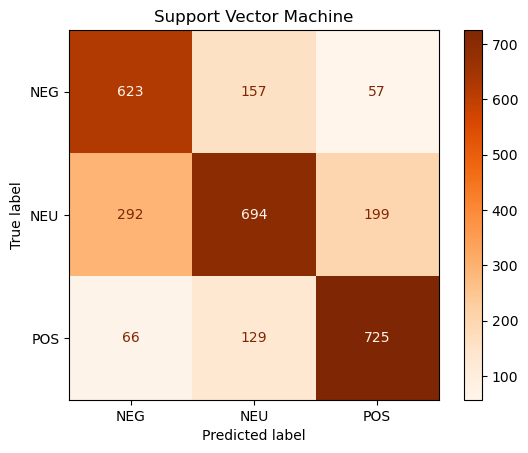

{'accuracy': 0.6940856560163154, 'recall': 0.6940904394377526, 'precision': 0.7060074856103699, 'f1_score': 0.6964111752883939}


In [8]:
from src.trainers.utils import evaluate_model
from src.trainers.utils import load_model

# Evaluar modelo con datos de prueba
pipeline = load_model(SVM_PIPELINE_PATH)
metrics = evaluate_model(pipeline, dataset_test, title="Support Vector Machine")
print(metrics)

## Test

In [9]:
from constants.constants_nlp import INDEX_TO_POLARITY
from src.preprocesamiento.clean import clean_text
from src.preprocesamiento.nlp_spacy import preprocesamiento

textos_test = ["Hola! cómo estás???😀","el dia de hoy estoy feliz y contento", "estoy muy triste", "Me encuentro estudiando para un exámen", "A veces me encuentro triste, pero la mayoria del tiempo estoy muy feliz"]
textos_test = list(map(lambda x: clean_text(x), textos_test))
textos_test = preprocesamiento(textos_test)

preds = pipeline.predict(textos_test)
for input, pred in zip(textos_test,preds):
    print(f"{input}: {INDEX_TO_POLARITY[pred]}")

Modelo cargado: es_core_news_sm


100%|██████████| 5/5 [00:00<00:00, 750.00it/s]
5it [00:00, 329.47it/s]

Aplicando stemming...
Total de documentos preprocesados: 5
hol estar: NEU
feliz content: POS
trist: NEG
encontr estudi exam: NEU
encontr trist mayor tiemp feliz: NEG
